# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/clustering_bank_transaction.csv')

In [5]:
print(df.columns)

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType_encoded',
       'Location_encoded', 'Channel_encoded', 'CustomerOccupation_encoded',
       'cluster_kmeans', 'cluster_kmeans_pca', 'cluster_kmeans_optimal',
       'TransactionType_Encoded', 'Location_Encoded', 'Channel_Encoded',
       'CustomerOccupation_Encoded', 'TransactionType_Inverse',
       'Location_Inverse', 'Channel_Inverse', 'CustomerOccupation_Inverse',
       'Cluster'],
      dtype='object')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
            'LoginAttempts', 'AccountBalance', 'TransactionType_encoded',
            'Location_encoded', 'Channel_encoded', 'CustomerOccupation_encoded']

X = df[features]
y = df['Cluster']

print(y.value_counts())

Cluster
1    1041
0     875
2     366
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Jumlah baris data training: {X_train.shape[0]}')
print(f'Jumlah baris data testing: {X_test.shape[0]}')

Jumlah baris data training: 1825
Jumlah baris data testing: 457


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**Logistic Regression**

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_predict_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_predict_lr)
f1_lr = f1_score(y_test, y_predict_lr, average='weighted')

print("Logistic Regression Performance:")
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'F1 Score: {f1_lr:.4f}')
print("\nReport Klasifikasi")
print(classification_report(y_test, y_predict_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predict_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Performance:
Accuracy: 0.9912
F1 Score: 0.9912

Report Klasifikasi
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       175
           1       0.99      1.00      0.99       209
           2       1.00      0.99      0.99        73

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457


Confusion Matrix:
[[173   2   0]
 [  1 208   0]
 [  1   0  72]]


Logistic Regression ini digunakan untuk menyelesaikan masalah klasifikasi multikelas. Logistic Regression merupakan algoritma supervised learning yang digunakan untuk memprediksi probabilitas dari berbagai kelas target. Pada algoritma tersebut diatur parameter `multi_class='multinomial' `yang berarti model menggunakan pendekatan multinomial logistic regression yang cocok untuk klasifikasi dengan lebih dari dua kelas.





## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**Random Forest**

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf, average='weighted')

print("Random Forest Performance:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print("\nReport Klasifikasi")
print(classification_report(y_test, y_predict_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predict_rf))

Random Forest Performance:
Accuracy: 1.0000
F1 Score: 1.0000

Report Klasifikasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00        73

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457


Confusion Matrix:
[[175   0   0]
 [  0 209   0]
 [  0   0  73]]


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Confusion Matrix (Logistic Regression vs Random Forest)**

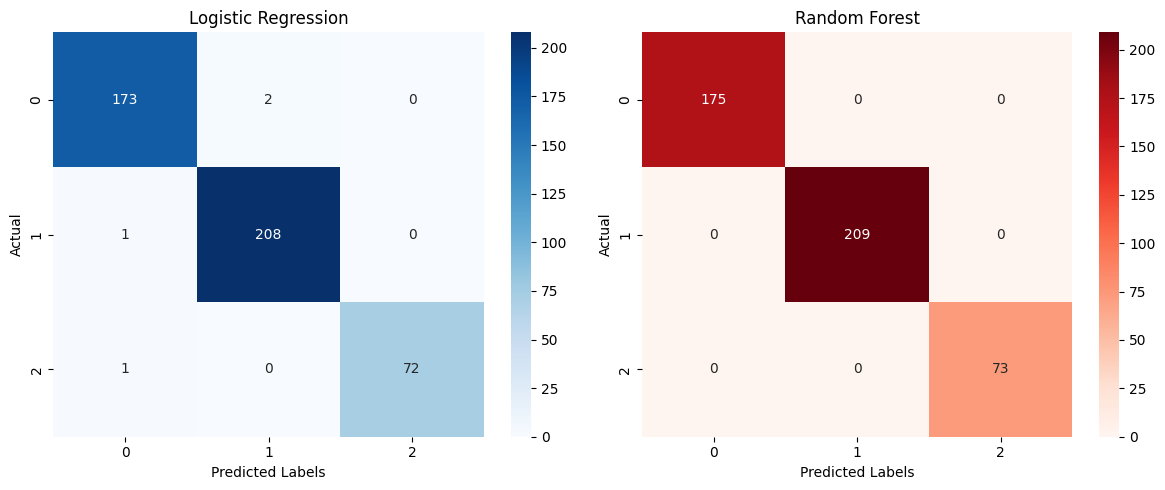

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_predict_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Perbandingan Akurasi dan F1 Score**

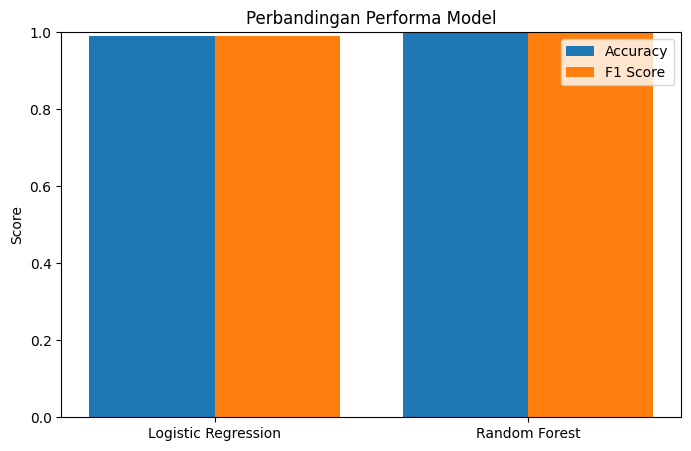

In [18]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracy = [accuracy_lr, accuracy_rf]
f1_scores = [f1_lr, f1_rf]

x = range(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, accuracy, label='Accuracy', width=0.4, align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Perbandingan Performa Model')
plt.legend()
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
param_grid = {'n_estimators' : [50, 100, 200],
              'max_depth' : [None, 10, 20, 30],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1_weighted'
                          )

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_predict_best_rf = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_predict_best_rf)
f1_best_rf = f1_score(y_test, y_predict_best_rf, average='weighted')

print("\nTuned Random Forest Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_predict_best_rf))


Tuned Random Forest Performance:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00        73

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

# 1. Menggunakan Model dengan hyperparameter terbaik

In [20]:
best_rf = grid_search.best_estimator_

print("Best Parameters Found:")
print(grid_search.best_params_)

Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# 2. Evaluasi pada Training Set (Untuk memeriksa overfitting)

In [21]:
y_train_predict = best_rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_predict)
train_f1 = f1_score(y_train, y_train_predict, average='weighted')

print("\nPerformance on Training Set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_predict))


Performance on Training Set:
Accuracy: 1.0000
F1-Score: 1.0000

Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       832
           2       1.00      1.00      1.00       293

    accuracy                           1.00      1825
   macro avg       1.00      1.00      1.00      1825
weighted avg       1.00      1.00      1.00      1825



## 3. Evaluasi pada testing set

In [23]:
y_test_predict = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_predict)
test_f1 = f1_score(y_test, y_test_predict, average='weighted')

print("\nPerformance on Testing Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_predict))
print("\nConfusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_predict))


Performance on Testing Set:
Accuracy: 1.0000
F1-Score: 1.0000

Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00        73

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457


Confusion Matrix (Testing):
[[175   0   0]
 [  0 209   0]
 [  0   0  73]]


# 4. Perbandingan dengan model sebelum tuning

In [24]:
# Model Random Forest sebelum tuning
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Hitung metrik evaluasi sebelum tuning
accuracy_before = accuracy_score(y_test, y_predict_rf)
f1_before = f1_score(y_test, y_predict_rf, average='weighted')

# Hitung metrik evaluasi setelah tuning
accuracy_after = test_accuracy
f1_after = test_f1

# Buat tabel perbandingan
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score'],
    'Before Tuning': [accuracy_before, f1_before],
    'After Tuning': [accuracy_after, f1_after],
    'Improvement': [accuracy_after - accuracy_before, f1_after - f1_before]
})

print("\nPerformance Comparison:")
print(comparison)


Performance Comparison:
     Metric  Before Tuning  After Tuning  Improvement
0  Accuracy            1.0           1.0          0.0
1  F1-Score            1.0           1.0          0.0


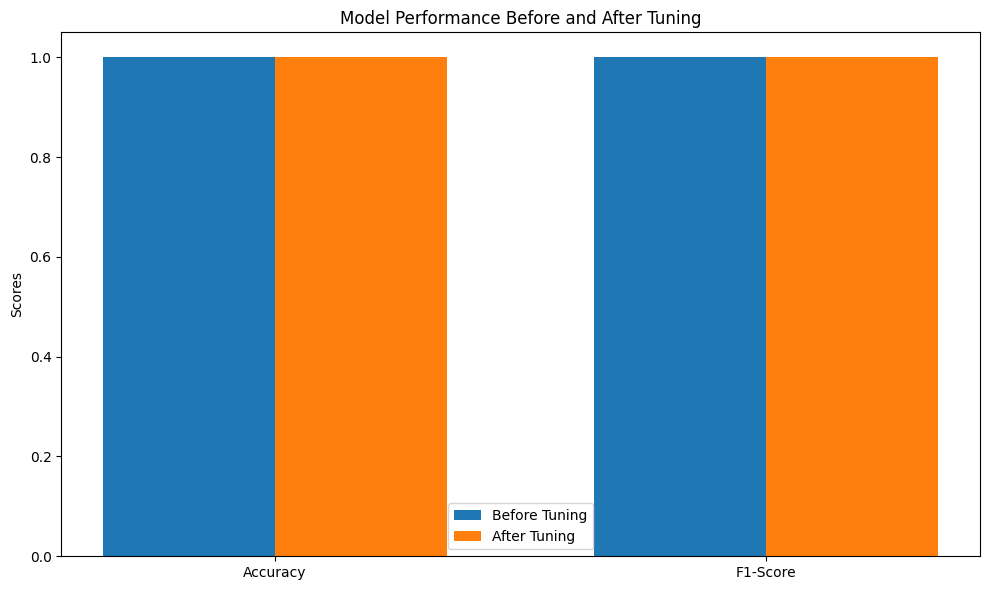

In [25]:
import matplotlib.pyplot as plt

# Visualisasi perbandingan performa
metrics = ['Accuracy', 'F1-Score']
before = [accuracy_before, f1_before]
after = [accuracy_after, f1_after]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, before, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, after, width, label='After Tuning')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [31]:
import pandas as pd

# Data untuk tabel evaluasi model
data = {
    "Metric": ["Akurasi", "F1 Score"],
    "Sebelum Tuning ": ["100%", "100%"],
    "Setelah Tuning": ["100%", "100%"],
    "Perubahan" : ["0%", "0%"]
}

df = pd.DataFrame(data)
display(df)  # Menampilkan tabel di notebook

,Metric,Sebelum Tuning,Setelah Tuning,Perubahan
0,Akurasi,100%,100%,0%
1,F1 Score,100%,100%,0%


In [29]:
print(classification_report(y_test, y_test_predict, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       175
           1      1.000     1.000     1.000       209
           2      1.000     1.000     1.000        73

    accuracy                          1.000       457
   macro avg      1.000     1.000     1.000       457
weighted avg      1.000     1.000     1.000       457




1.   Bandingkan hasil evaluasi sebelum dan setelah tuning
*   Hasil menunjukkan performa model sudah sangat tinggi bahkan sebelum tuning.
*   Tidak ada peningkatan secara numerik, namun tuning tetap penting untuk memastikan bahwa model tidak overfitting atau terlalu kompleks.

2.   Evaluasi Overfitting atau Underfitting
*   Akurasi dan F1 Score pada training dan testing set = 100%.
*   Confusion matrix menunjukkan tidak ada kesalahan pada data uji.
*   Kemungkinan besar model mengalami overfitting, karena performanya telalu sempurna.

3.    Identifikasi Kelemahan Potensial
*   Overfitting : Meskipun evaluasi menunjukkan skor sempurna, ini dapat menunjukkan bahwa model terlalu menghafal data.
*   Tidak terlihat kelemahan per kelas, namun evaluasi lebih realistis dapat dilakukan dengan cara menguji data baru, cross validation lebih dalam dan cek apakah distribusi data seimbang.

4.      Rekomendasi Tindak Lanjutan
*   Validasi Eksternal : Gunakan data baru atau cross validation pada fold yang lebih besar untuk konfirmasi generalisasi model.
*   Regularisasi : tambahkan batasan seperti
```
max_depth, min_samples_leaf
```
 untuk melihat efeknya terhadap performa jika performa "realistis" yang diharapkan.
*   Jika jumlah data per kelas tidak seimbang, pertimbangkan SMOTE atau clas_weight='balanced'

Kesimpulan :       

1.   Performa Model Sangat Tinggi, baik sebelum maupun setelah tuning, model Random Forest menunjukkan skor akurasi dan F1 Score sebesar 100%, baik pada data latih maupun data uji. Hal ini mengindikasikan bahwa model mampu mengklasifikasikan data dengan sangat baik tanpa kesalahan.
2.   Tuning Tidak Memberikan Peningkatan Signifikan, setelah melalukan pencarian hyperparameter terbaik dengan GridSearchCV, performa model tidak meningkat secara numerik karena sebelumnya pun model sudah mencapai performa maksimal. Namun, proses tuning tetap menjadi hal penting untuk memastikan bahwa model menggunakan konfigurasi yang optimal.
3.    Skor sempurna dari kedua dataset (training dan testing) menimbulkan kemungkinan bahwa model mengalami overfitting yaitu model terlalu cocok dengan data pelatihan dan mungkin tidak bekerja dengan baik pada data baru yang berbeda.











